# Stack overflow analysis

This  is a survey from Stack Overflow (2023), this survey about how developers learn and level up, which tools they're using, and which ones they want. Analysing the survey can help with understanding the labour market, and which study tools and techniques can help to grow.

My main goal is to create regression model for predict the annual salary and also provide some analysis

In [483]:
import pandas as pd
import sklearn.ensemble as sklearn_ensemble
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [484]:
data_full = pd.read_csv("C:\\Users\\HP\\Downloads\\stack-overflow-survey-2023\\survey_results_public.csv")
# data_full = pd.read_csv("datasets/stackoverflow_result.csv")

In [485]:
data_full.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


I will select the most relevant columns from the dataset and divide them into two dataframes. The first dataframe will contain columns related to learning and education, while the second one will focus on employment and work-related aspects.

In [486]:
df_learning = data_full[["ResponseId", "MainBranch", 'Age', "CodingActivities", "EdLevel", "LearnCode", "LearnCodeOnline", 'LearnCodeCoursesCert', "LanguageHaveWorkedWith", "ConvertedCompYearly"]]

df_work = pd.DataFrame(data_full[['Age', "Employment", "RemoteWork", 'YearsCode', 'YearsCodePro', 'DevType', 'LanguageHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'ConvertedCompYearly']])

### Data processing

At the begginning I'm going to remove all rows with NaN in "ConvertedCompYearly", because according to my task, this column will be the target variable.
Firstly I wanted to replace all values with median or average values but because almost 50% of all values is NaN, I guess it will be not so good. Instead, I'm going to drop all rows with missing values in this column

In [487]:
data_full = data_full.dropna(subset=["ConvertedCompYearly"])

In [488]:
data_full

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
5,6,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Observability to...,Other,Appropriate in length,Neither easy nor difficult,96828.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89162,89163,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,60-120 minutes a day,60-120 minutes a day,Automated testing;Developer portal or other ce...,"Information Services, IT, Software Development...",Appropriate in length,Neither easy nor difficult,50719.0
89166,89167,I agree,I am a developer by profession,18-24 years old,"Employed, full-time;Independent contractor, fr...",In-person,Contribute to open-source projects;Professiona...,Some college/university study without earning ...,Books / Physical media;Hackathons (virtual or ...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,1-2 times a week,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Continuous integ...,Financial Services,Appropriate in length,Neither easy nor difficult,16917.0
89167,89168,I agree,I am a developer by professio

Now my aim is to convert all objects type columns into numerical values

In [489]:
data_full.dtypes

ResponseId               int64
Q120                    object
MainBranch              object
Age                     object
Employment              object
                        ...   
ProfessionalTech        object
Industry                object
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
Length: 84, dtype: object

In our data we see that almost all coulmn are object types, we need to convert them to numeric types for further analysis

#### Age processing

I will begin with age processing

In [490]:
data_full.Age.value_counts(dropna=False)

Age
25-34 years old       22163
35-44 years old       13848
18-24 years old        4922
45-54 years old        4866
55-64 years old        1795
65 years or older       339
Under 18 years old       56
Prefer not to say        30
Name: count, dtype: int64

As we see there are 8 types of age, I will simply replace string values with numerical values

In [491]:
data_full.Age = data_full.Age.replace({
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '18-24 years old': 21,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 65,
    'Under 18 years old': 17.5,
    'Prefer not to say': np.mean([29.5, 39.5, 21, 49.5, 59.5, 65, 17.5])
})

C:\Users\HP\AppData\Local\Temp\ipykernel_18292\3851193413.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_full.Age = data_full.Age.replace({


#### Employment processing

In [492]:
data_full.Employment.head()

1                                  Employed, full-time
2                                  Employed, full-time
3                                  Employed, full-time
4    Employed, full-time;Independent contractor, fr...
5                                  Employed, full-time
Name: Employment, dtype: object

Here we see that there is a NaN values, also in or column located different elements separeted by commas and ";"
First i would split all the values and see how many values there including NaN values

In [493]:
data_full.Employment.str.split('[,;]').explode().value_counts(dropna=False)

Employment
Employed                  44281
 full-time                42866
Independent contractor     7568
 freelancer                7568
 or self-employed          7568
 part-time                 1415
Retired                      66
I prefer not to say          34
NaN                          12
Name: count, dtype: int64

I decided to chose one hot encoding and divide this column into smaller ones

In [494]:
data_full_employed = data_full["Employment"].str.replace(";", ",").str.get_dummies(sep=',')

#### Nominative column processing

For all other remaining columns with nominal values I'm also going to use one hot encoding
NaN i will fill with "Unknown"

In [495]:
data_full.RemoteWork.value_counts(dropna=False)

RemoteWork
Remote                                  21138
Hybrid (some remote, some in-person)    20276
In-person                                6526
NaN                                        79
Name: count, dtype: int64

In [496]:
data_full_remote_work = data_full.RemoteWork.fillna('Unknown').str.get_dummies()
data_full_devType = data_full.DevType.fillna('Unknown').str.get_dummies(sep=',')
data_full_LanguageHaveWorkedWith = data_full.LanguageHaveWorkedWith.fillna('Unknown').str.get_dummies(sep=';')
data_full_ToolsTechHaveWorkedWith = data_full.ToolsTechHaveWorkedWith.fillna('Unknown').str.get_dummies(sep=';')

I would also create two columns "Main Language" and "Main Tools" it would be the first value in cell

In [497]:
data_full_MainLanguage = data_full.LanguageHaveWorkedWith.str.split(';').str[0].explode().fillna('Unknown')
data_full_MainTool = data_full.ToolsTechHaveWorkedWith.str.split(';').str[0].explode().fillna('Unknown')

In [498]:
data_full.CodingActivities.str.split(';').explode().value_counts(dropna=False)

CodingActivities
Hobby                                                                  33846
Professional development or self-paced learning from online courses    17444
Contribute to open-source projects                                     11506
Freelance/contract work                                                 8505
Bootstrapping a business                                                6714
I don’t code outside of work                                            6373
School or academic work                                                 2840
Other (please specify):                                                  765
NaN                                                                      101
Name: count, dtype: int64

In [499]:
data_full_CodingActivities = data_full.CodingActivities.fillna('Unknown').str.get_dummies(sep=';')
data_full_EdLevel = data_full.EdLevel.fillna('Unknown').str.get_dummies(sep=';')
data_full_LearnCode = data_full.LearnCode.fillna('Unknown').str.get_dummies(sep=';')
data_full_LearnCodeOnline = data_full.LearnCodeOnline.fillna('Unknown').str.get_dummies(sep=';')
data_full_LearnCodeCoursesCert = data_full.LearnCodeCoursesCert.fillna('Unknown').str.get_dummies(sep=';')


In [500]:
data_full_LearnCodeCoursesCert

,Codecademy,Coursera,Other,Pluralsight,Skillsoft,Udacity,Udemy,Unknown,edX
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,0,0,1
5,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
89162,0,0,0,0,0,0,0,1,0
89166,1,0,0,0,0,0,1,0,0
89167,0,1,0,0,0,0,1,0,1
89170,0,0,1,0,0,0,0,0,0


#### Numeric value processing

With numerical values will be much easier because all I need to do is change string digital values to integer

First let see is there something something that is not a number

In [501]:
data_full["YearsCode"].loc[~data_full["YearsCode"].str.isdigit().fillna(False)].value_counts(dropna=False)
# Here we take only such values that are digit but later with "~" it will mean that we take only non digit values

C:\Users\HP\AppData\Local\Temp\ipykernel_18292\1964401080.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_full["YearsCode"].loc[~data_full["YearsCode"].str.isdigit().fillna(False)].value_counts(dropna=False)


YearsCode
More than 50 years    103
Less than 1 year       69
NaN                    69
Name: count, dtype: int64

In [502]:
data_full_YearsCode = data_full.YearsCode.replace({'Less than 1 year': 1,
                                'More than 50 years': 50})
data_full_YearsCode = pd.to_numeric(data_full_YearsCode)
data_full_YearsCode = data_full_YearsCode.fillna(data_full_YearsCode.mean())

In [503]:
data_full_YearsCodePro = data_full.YearsCodePro.replace({'Less than 1 year': 1,
                                'More than 50 years': 50})
data_full_YearsCodePro = pd.to_numeric(data_full_YearsCodePro)
data_full_YearsCodePro = data_full_YearsCodePro.fillna(data_full_YearsCodePro.mean())

In [504]:
data_full['ConvertedCompYearly'].describe()

count    4.801900e+04
mean     1.031101e+05
std      6.814188e+05
min      1.000000e+00
25%      4.390700e+04
50%      7.496300e+04
75%      1.216410e+05
max      7.435143e+07
Name: ConvertedCompYearly, dtype: float64

Here we see that there is huge difference between 75% and max value, that mean that we have large deviation

<Axes: xlabel='ConvertedCompYearly'>

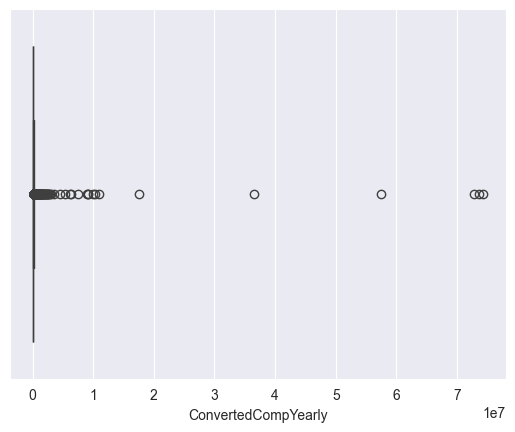

In [505]:
sns.boxplot(data_full, x='ConvertedCompYearly')

The diagram also confirm that, someone even wrote that received 9 millions per year

In [506]:
data_full['ConvertedCompYearly'] = data_full['ConvertedCompYearly'].where(
    data_full['ConvertedCompYearly'] < 500000, 
    data_full['ConvertedCompYearly'].mean()
)

In [507]:
data_full['ConvertedCompYearly'].isna().sum()

np.int64(0)

In [508]:
data_full['ConvertedCompYearly']

1        285000.0
2        250000.0
3        156000.0
4         23456.0
5         96828.0
           ...   
89162     50719.0
89166     16917.0
89167     15752.0
89170     64254.0
89171     61041.0
Name: ConvertedCompYearly, Length: 48019, dtype: float64

In [509]:
df_work_processed = pd.concat([
    data_full.Age,
    data_full_employed,
    data_full_remote_work,
    data_full_devType,
    data_full_LanguageHaveWorkedWith,
    data_full_ToolsTechHaveWorkedWith,
    data_full_YearsCode,
    data_full_YearsCodePro,
    data_full.ConvertedCompYearly
], axis=1)



In [510]:
df_learning_processed = pd.concat([
    data_full.Age,
    data_full_CodingActivities,
    data_full_EdLevel,
    data_full_LearnCode,
    data_full_LearnCodeOnline,
    data_full_LearnCodeCoursesCert,
    data_full.ConvertedCompYearly
], axis=1)

In [511]:
df_work_processed.dtypes

Age                    float64
 freelancer              int64
 full-time               int64
 or self-employed        int64
 part-time               int64
                        ...   
snitch                   int64
tunit                    int64
YearsCode              float64
YearsCodePro           float64
ConvertedCompYearly    float64
Length: 162, dtype: object

# Work analysis

#### Corelation analysis

For calculate correlation exists differents method like: Pearson correlation, Spearman correlation, Kendall correlation.
Since my data doesn't have linear relationship  and has data outliers I won't to use Pearson method.
Also for estimate feature importance could be used random forest

###### Pearson method

In [512]:
target_corr = df_work_processed.corr(method="kendall")['ConvertedCompYearly']
top_correlations = target_corr.sort_values(ascending=False)
top_correlations

ConvertedCompYearly    1.000000
YearsCodePro           0.283905
YearsCode              0.270982
Age                    0.251624
Terraform              0.149332
                         ...   
 part-time            -0.081763
Composer              -0.082336
Developer             -0.095186
PHP                   -0.119762
In-person             -0.147827
Name: ConvertedCompYearly, Length: 162, dtype: float64

###### Spearman method

In [513]:
spearman_corr = df_work_processed.corr(method="spearman")["ConvertedCompYearly"].sort_values(ascending=False)
print(spearman_corr.head(10))


ConvertedCompYearly        1.000000
YearsCodePro               0.406305
YearsCode                  0.388945
Age                        0.327666
Terraform                  0.182637
Homebrew                   0.166788
Remote                     0.154394
Kubernetes                 0.140930
Bash/Shell (all shells)    0.140578
Go                         0.111216
Name: ConvertedCompYearly, dtype: float64


###### Feature importance using random forest

In [514]:
x = df_work_processed.drop(columns=["ConvertedCompYearly"])
y = df_work_processed.ConvertedCompYearly

model = sklearn_ensemble.RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x, y)

RandomForestRegressor(random_state=42)

<Axes: >

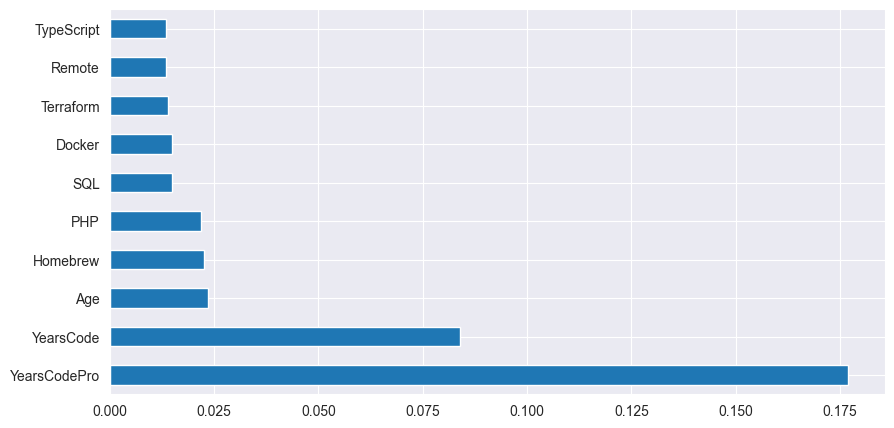

In [515]:
feature_importance = pd.Series(model.feature_importances_, index=x.columns)
feature_importance.sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,5))

#### Factors visualisation

In [516]:
def MainLanguages_top(n):
    top_languages = data_full_MainLanguage.value_counts().head(n).index
    return data_full_MainLanguage.where(data_full_MainLanguage.isin(top_languages), 'unknown')
def MainTools_top(n):
    top_tools = data_full_MainTool.value_counts().head(n).index
    return data_full_MainTool.where(data_full_MainTool.isin(top_tools), 'unknown')

<Axes: xlabel='ConvertedCompYearly', ylabel='YearsCodePro'>

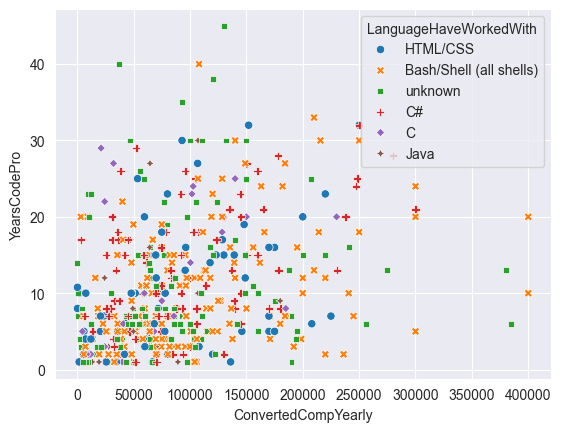

In [539]:
sns.scatterplot(df_work_processed.sample(frac=0.01, random_state=11), x='ConvertedCompYearly', y='YearsCodePro', style=MainLanguages_top(5), hue=MainLanguages_top(5))

<Axes: xlabel='ConvertedCompYearly', ylabel='LanguageHaveWorkedWith'>

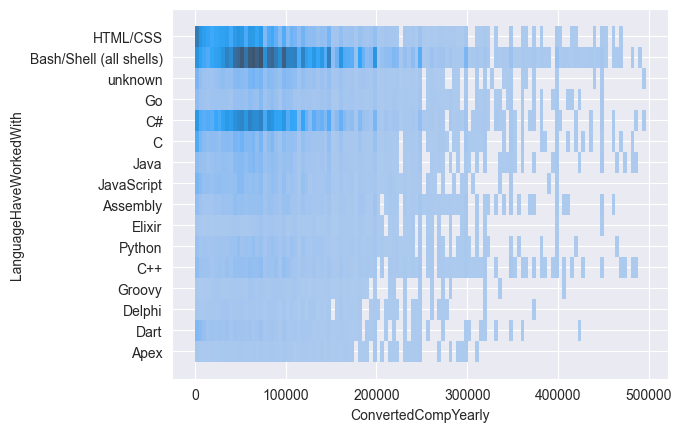

In [518]:
sns.histplot(df_work_processed, x='ConvertedCompYearly', y=MainLanguages_top(15))

<Axes: xlabel='Count', ylabel='LanguageHaveWorkedWith'>

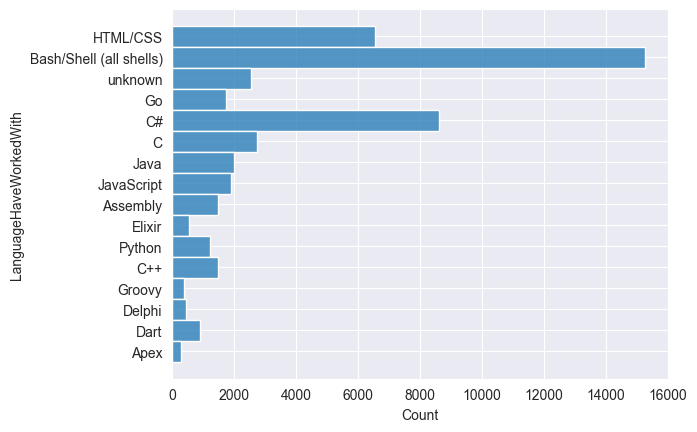

In [519]:
sns.histplot(df_work_processed, y=MainLanguages_top(15))

Tools

<Axes: xlabel='ConvertedCompYearly', ylabel='ToolsTechHaveWorkedWith'>

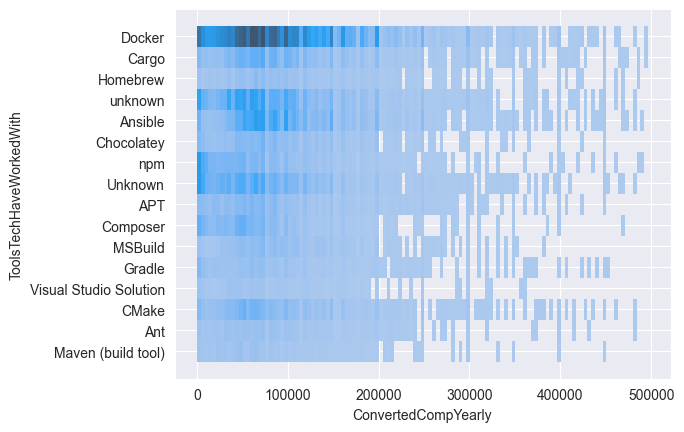

In [520]:
sns.histplot(df_work_processed, x='ConvertedCompYearly', y=MainTools_top(15))

<Axes: xlabel='Count', ylabel='ToolsTechHaveWorkedWith'>

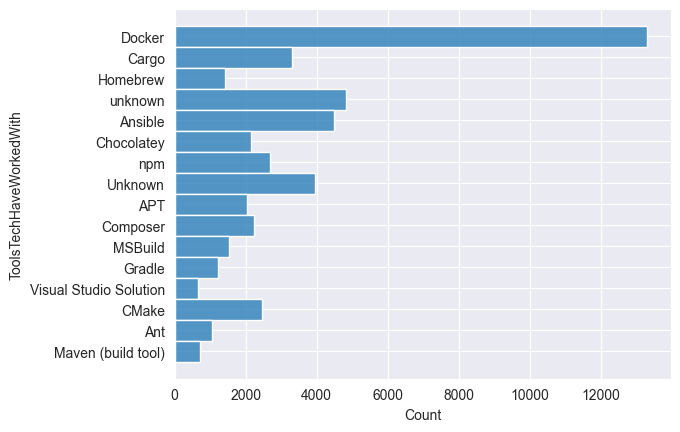

In [521]:
sns.histplot(y=MainTools_top(15))

# Analysing learning method

I would consider the annual salary as a factor of a good learning method, if using one method will affect the salary, it will mean that it is a good learning method
Of course, the analysis can also show that there is no difference between the learning methods

In [522]:
df_learning_processed.corr()['ConvertedCompYearly'].sort_values(ascending=False)

ConvertedCompYearly                                                                   1.000000
Age                                                                                   0.265206
Unknown                                                                               0.137813
Books / Physical media                                                                0.112158
Contribute to open-source projects                                                    0.070665
On the job training                                                                   0.065409
Bootstrapping a business                                                              0.052191
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          0.045621
I don’t code outside of work                                                          0.036196
Other (please specify):                                                               0.032210
Auditory material (e.g., podcasts)                

We can see that there is no difference between the training methods, and given that this dataframe has columns that are only about learning, the impact of learning methods may be even smaller in the full dataset

# Regression model

### Linear regression

For the linear regression model, I will use statsmodels because it supports multiple linear regression and provides a very convenient .summary() function for interpreting results

In [523]:
X = sm.add_constant(df_work_processed.drop(columns='ConvertedCompYearly'))
y = df_work_processed.ConvertedCompYearly

model = sm.OLS(y, X).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     ConvertedCompYearly   R-squared:                       0.251
Model:                             OLS   Adj. R-squared:                  0.249
Method:                  Least Squares   F-statistic:                     104.8
Date:                 Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                         17:23:32   Log-Likelihood:            -5.9591e+05
No. Observations:                48019   AIC:                         1.192e+06
Df Residuals:                    47865   BIC:                         1.193e+06
Df Model:                          153                                         
Covariance Type:             nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [524]:
print(model.pvalues.sort_values(ascending=False).head())

Haskell                0.932097
Julia                  0.922997
Lua                    0.913697
Erlang                 0.902614
I prefer not to say    0.828027
dtype: float64


From the summary, we can see that many variables have very high p-values (much greater than 0.05), suggesting they may act as noise and have little impact on the dependent variable. Additionally, the standard errors for these coefficients are notably high, indicating a lack of precision in their estimates.
The notes also indicate strong multicollinearity in the model.
Therefore I need to deal with it somehow

First I want to try clear all variables that have high variance inflation factor. VIF is an indicator that measures how much a variable is linearly related to other variables. When two variables are highly correlated, it leads to multicollinearity, which distorts the model’s ability to isolate individual effects and inflates standard errors

In [525]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# I take only these columns where VIF are less than 10
selected_features = vif_data[vif_data["VIF"] < 10]["Feature"].tolist()
X_filtered = X[selected_features]

C:\Users\HP\Desktop\КПІ\Машинне навчання\MachineLearningCourse\venv\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\HP\Desktop\КПІ\Машинне навчання\MachineLearningCourse\venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Also I want to clear high p-values, so I'm going to create a function that will do that

In [526]:
def drop_high_pvalue_features(input_X, input_y, threshold=0.05):
    while True:
        X_with_const = sm.add_constant(input_X, has_constant='add')
        tmp_model = sm.OLS(input_y, X_with_const).fit()
        pvalues = tmp_model.pvalues
        
        max_pvalue = pvalues.drop('const', errors='ignore').max()
        if max_pvalue > threshold:
            worst_feature = pvalues.drop('const', errors='ignore').idxmax()
            input_X = input_X.drop(columns=[worst_feature])
        else:
            break

    return input_X

X_new = drop_high_pvalue_features(X_filtered, y, threshold=0.05)

In [527]:
model = sm.OLS(y, X_new).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     ConvertedCompYearly   R-squared:                       0.223
Model:                             OLS   Adj. R-squared:                  0.222
Method:                  Least Squares   F-statistic:                     193.9
Date:                 Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                         17:25:21   Log-Likelihood:            -5.9679e+05
No. Observations:                48019   AIC:                         1.194e+06
Df Residuals:                    47947   BIC:                         1.194e+06
Df Model:                           71                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

The accuracy of the model slightly decreased. I also noticed that the target variable is highly positively skewed (Skew: 1.598), which may partly explain the large standard error of the model’s coefficients
Let's check whether the model really has skew using a histogram

(array([3220., 2061., 2282., 2915., 3644., 3885., 3697., 3698., 3216.,
        2639., 2621., 1793., 1774., 1326., 1298., 1203., 1138.,  771.,
         813.,  490.,  728.,  324.,  371.,  209.,  234.,  392.,  135.,
         117.,   89.,   52.,  232.,   62.,   85.,   31.,   23.,  109.,
          28.,   32.,   28.,   13.,   98.,   16.,   18.,   17.,    7.,
          55.,    9.,    8.,    9.,    4.]),
 array([1.0000000e+00, 9.9320400e+03, 1.9863080e+04, 2.9794120e+04,
        3.9725160e+04, 4.9656200e+04, 5.9587240e+04, 6.9518280e+04,
        7.9449320e+04, 8.9380360e+04, 9.9311400e+04, 1.0924244e+05,
        1.1917348e+05, 1.2910452e+05, 1.3903556e+05, 1.4896660e+05,
        1.5889764e+05, 1.6882868e+05, 1.7875972e+05, 1.8869076e+05,
        1.9862180e+05, 2.0855284e+05, 2.1848388e+05, 2.2841492e+05,
        2.3834596e+05, 2.4827700e+05, 2.5820804e+05, 2.6813908e+05,
        2.7807012e+05, 2.8800116e+05, 2.9793220e+05, 3.0786324e+05,
        3.1779428e+05, 3.2772532e+05, 3.3765636e+05, 3.4

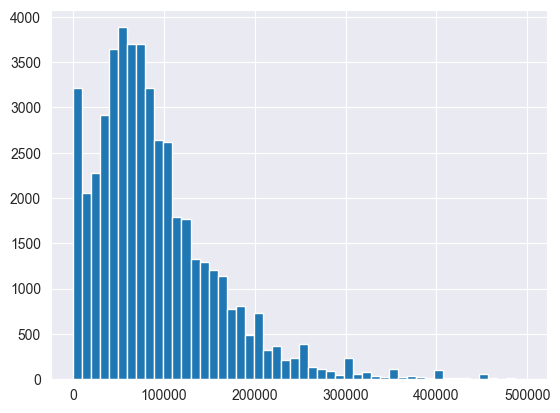

In [528]:
plt.hist(df_work_processed["ConvertedCompYearly"], bins=50)

As expected, the target variable exhibits a strong positive skew. To address this issue, I applied a logarithmic transformation to the target and removed extreme outliers by filtering values outside the 5,000 to 300,000 range.

In [529]:
full_data = pd.concat([X_new, y], axis=1)
full_data = full_data[(full_data.ConvertedCompYearly > 5000) & (full_data.ConvertedCompYearly < 300000)]

X_new = full_data.drop(columns=['ConvertedCompYearly'])
y = np.log(full_data.ConvertedCompYearly)

In [530]:
X_new = drop_high_pvalue_features(X_new, y, threshold=0.05)

In [531]:
model = sm.OLS(y, X_new).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     ConvertedCompYearly   R-squared:                       0.240
Model:                             OLS   Adj. R-squared:                  0.239
Method:                  Least Squares   F-statistic:                     254.1
Date:                 Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                         17:25:24   Log-Likelihood:                -46006.
No. Observations:                45155   AIC:                         9.213e+04
Df Residuals:                    45098   BIC:                         9.262e+04
Df Model:                           56                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

After the transformation, the skewness became negative (Skew: -0.738), indicating a significant improvement in symmetry. The standard errors of the coefficients also became more stable, and the model’s R-squared increased, suggesting a better overall fit.

However, multicollinearity is still present, as indicated by a high condition number (Cond. No. ≈ 1220)

### Random forest regressor

Since the dataset has high multicollinearity, I decided to train a Random Forest Regressor, as it is robust to multicollinearity and does not rely on feature independence like linear models

In [532]:
from sklearn.ensemble import RandomForestRegressor

In [533]:
from sklearn.model_selection import train_test_split
RFR = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=11)
X_train = X_train.drop(columns = ['const'])
X_test = X_test.drop(columns = ['const'])

RFR.fit(X_train, y_train)
RFR.score(X_test, y_test)


0.20177656310540004

The model with default parameters achieved an R-square score of 0.203
To improve the performance, I performed hyperparameter tuning using GridSearchCV

In [534]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

RFR = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(RFR, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


C:\Users\HP\Desktop\КПІ\Машинне навчання\MachineLearningCourse\venv\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.28538768340039594


After optimization, the best model achieved an R-square score of 0.285, which is higher than the result from linear regression

# Conclusion

My initial regression model demonstrated poor performance. One possible reason was the lack of a clear linear relationship in the data. Additionally, I encountered significant multicollinearity issues, which appeared after applying one-hot encoding. In the original dataset, columns like "LanguageHaveWorkedWith" often include similar sets of technologies, such as "CSS, JS, PHP, HTML." As a result, the corresponding one-hot encoded features tend to be highly correlated with each other, which leads to multicollinearity and affects the model's reliability.

To address these issues, I applied a logarithmic transformation to the target variable, limited extreme values to reduce noise, and retrained the linear regression model. These changes helped to stabilize the standard error and slightly improve the R-square score.

However, due to the high multicollinearity and potential non-linearity in the data, I also decided to try a Random Forest Regressor, as it is more robust in such cases. With this regressor I achieved a score of 0.285 — higher than previous models.